<a href="https://colab.research.google.com/github/DeepeshMadane/CODSOFT_ML/blob/main/Movie_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
train_path = "/content/train_data.txt"
df_train = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [22]:
df_train.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [23]:
df_train['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [24]:
df_train.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [26]:
df_train.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [27]:
df_train.duplicated().sum()

0

In [28]:
# Load the test data
test_path = "/content/test_data.txt"
df_test = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
df_test.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


# EDA

Genre
 drama           25.109750
 documentary     24.156122
 comedy          13.736304
 short            9.357362
 horror           4.065371
 thriller         2.934666
 action           2.425573
 western          1.903567
 reality-tv       1.630575
 family           1.446121
 adventure        1.429520
 music            1.348360
 romance          1.239532
 sci-fi           1.193419
 adult            1.088280
 crime            0.931494
 animation        0.918582
 sport            0.796842
 talk-show        0.721216
 fantasy          0.595787
 mystery          0.588409
 musical          0.510938
 biography        0.488804
 history          0.448224
 game-show        0.357841
 news             0.333862
 war              0.243480
Name: proportion, dtype: float64


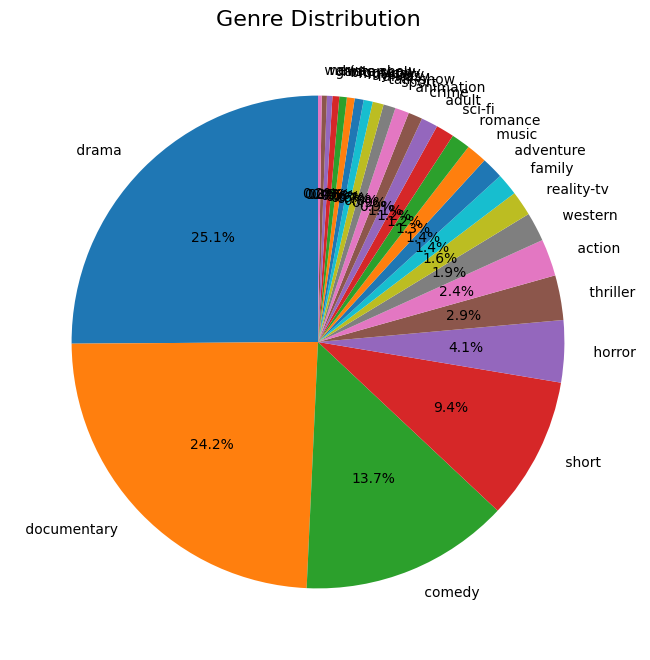

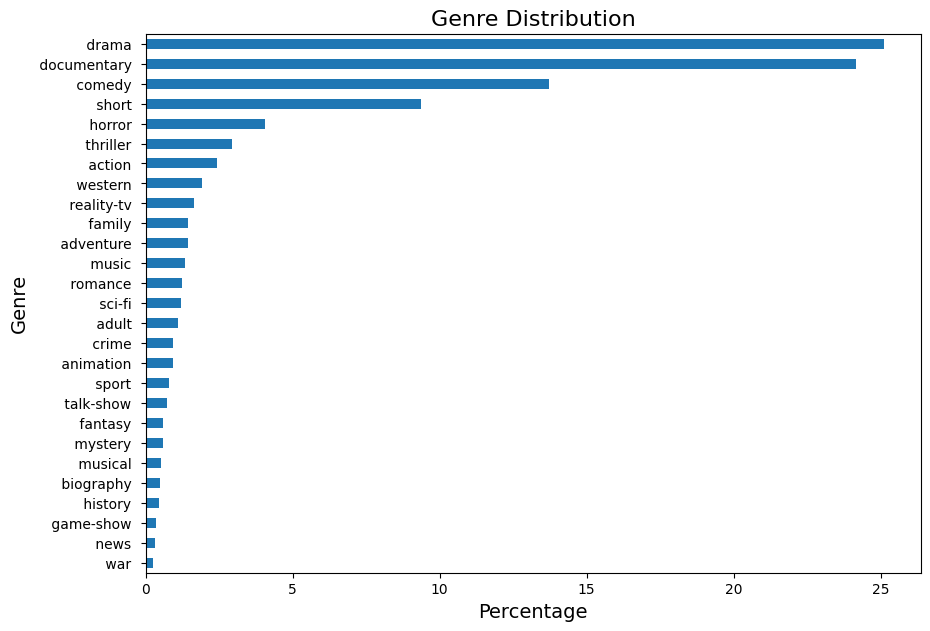

In [30]:
# Calculate the percentage of each genre
genre_percentages = df_train['Genre'].value_counts(normalize=True) * 100

# Print the genre percentages
print(genre_percentages)

# Create a pie chart of the genre distribution
plt.figure(figsize=(8, 8))
plt.pie(genre_percentages, labels=genre_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Genre Distribution', fontsize=16)
plt.show()

# Create a horizontal bar chart of the genre distribution
plt.figure(figsize=(10, 7))
genre_percentages.sort_values().plot(kind='barh')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Genre Distribution', fontsize=16)
plt.show()


# Data preprocessing

In [31]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# Initialize the stemmer and stop words
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string
import re

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
df_train['Text_cleaning'] = df_train['Description'].apply(clean_text)
df_test['Text_cleaning'] = df_test['Description'].apply(clean_text)

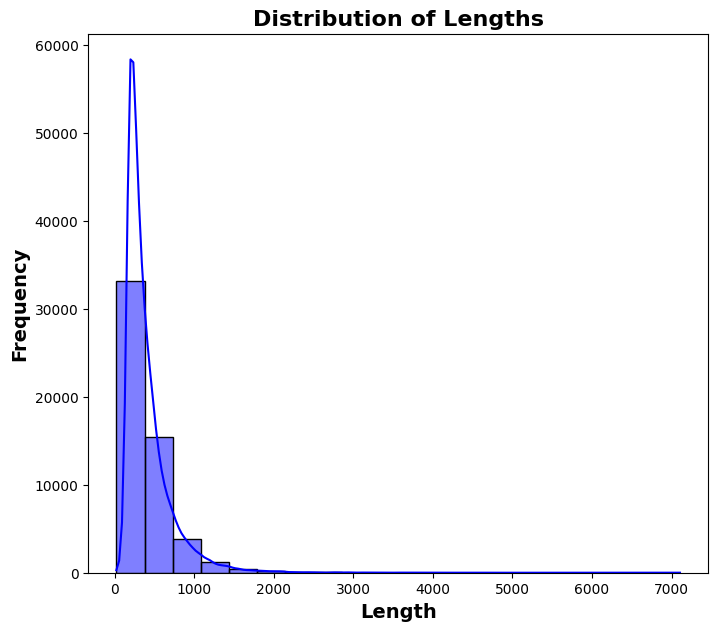

In [34]:
# Calculate the length of cleaned text
df_train['length_Text_cleaning'] = df_train['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=df_train, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [35]:
# Initialize the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(df_train['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(df_test['Text_cleaning'])

In [36]:
# prompt: split into train and test for inconsistent number

from sklearn.model_selection import train_test_split

# Assuming 'y' is your target variable (e.g., genre labels)
y = df_train['Genre']  # Replace 'Genre' with the actual column name

# Split the data into training and testing sets
X_train_split, X_test_split, y_train, y_test = train_test_split(
    X_train, y, test_size=0.2, random_state=42
)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_split, y_train)
lr_predictions = lr_model.predict(X_test_split)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_split, y_train)
nb_predictions = nb_model.predict(X_test_split)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split, y_train)
dt_predictions = dt_model.predict(X_test_split)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5808355621138062


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.56      0.22      0.32       263
       adult        0.82      0.21      0.33       112
   adventure        0.50      0.11      0.18       139
   animation        0.67      0.02      0.04       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.59      0.56      1443
       crime        0.50      0.01      0.02       107
 documentary        0.65      0.86      0.74      2659
       drama        0.53      0.81      0.64      2697
      family        0.50      0.05      0.09       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.93      0.35      0.51        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.55      0.61       431
       music        0.69      0.38      0.49       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

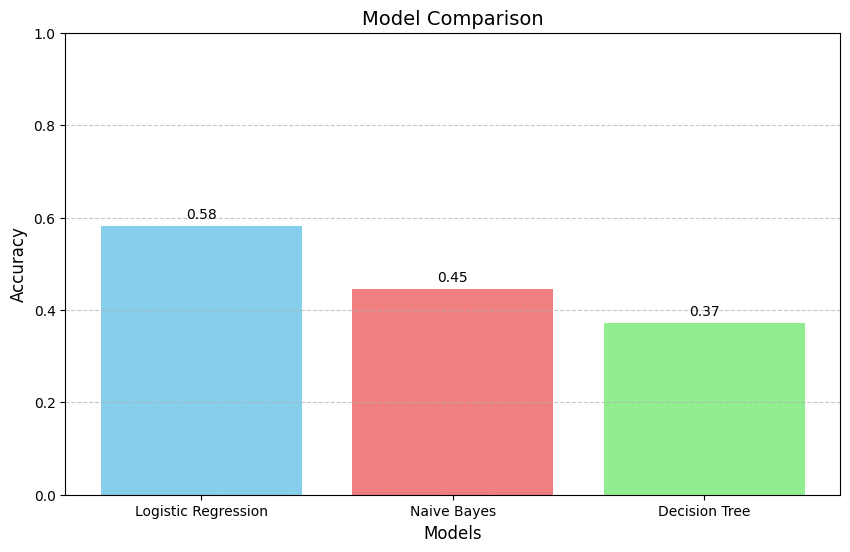

In [43]:
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree']
accuracies = [accuracy_score(y_test, lr_predictions),
              accuracy_score(y_test, nb_predictions),
              accuracy_score(y_test, dt_predictions)]

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightcoral', 'lightgreen']
plt.bar(models, accuracies, color=colors)

# Add labels, title, and grid
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Comparison', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()


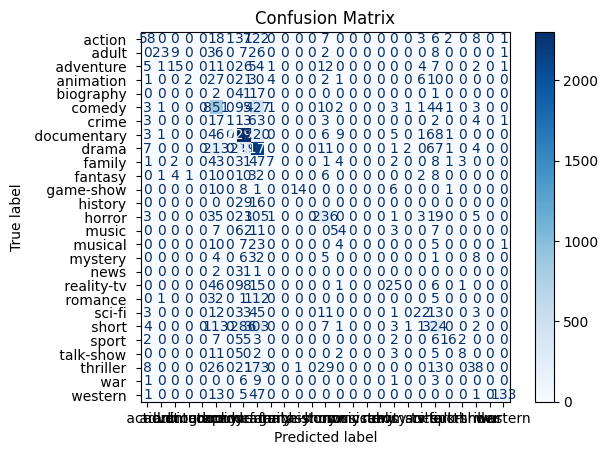

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Choose one of the models (e.g., Logistic Regression)
model = lr_model
predictions = lr_predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
